# Ejemplo de modelos realistas


Los valores revisados en la bibliografía y los ejemplos simulados se muestran en detalle en nuestro trabajo:

https://doi.org/10.1088/2057-1976/ab3330

Son cortes de muñeca y de tobillo. Pueden tener cuatro tipos de tejidos, cuyas propiedades dieléctricas en $f=1300$ MHz son:

- *Skin wet*, variable entre $\varepsilon_r = [28.0, 46.8]$ y $\sigma = [1.00, 1.08]$ S/m y un espesor variable entre $[1.46, 2.88]$ mm.
- *Muscle* variable entre $\varepsilon_r = [29.0, 70.0]$ y  $\sigma = [0.90, 1.55]$ S/m.
- *Cortical bone* fijo $\varepsilon_r =12.1$ y  $\sigma =  0.20$ S/m, espesor variable entre $[0.50, 3.00]$ mm
- *Trabecular bone* variable entre $\varepsilon_r = [12.5, 20.1]$ y  $\sigma =  [0.44, 0.92]$ S/m.

El medio de acoplamiento puede ser agua destilada y sal, es la solución estudiada en este trabajo (https://doi.org/10.1118/1.4788640), en particular es la solución *salt 17.5* cuyas propiedades dieléctricas relativas son: $ɛ^{*}_r≈ 76.95-26.97j$.

Los ejemplos de cortes de tobillo y muñeca están almacenados en el siguiente enlace público: https://github.com/rirastorza/heelSimulationDB

Todos los archivos .geo son del tipo CAD que se utilizan con Gmsh (https://gmsh.info/ un software de modelado CAD para cálculo de elementos finitos).

## Para correr en Google Colab

Ejecutar este documento en forma dinámica:[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rirastorza/heelSimulationDB/blob/main/examples/ejemplo_realistas2D.ipynb)

In [10]:
%%capture
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

In [12]:
%%capture
try:
    import gmsh
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
    import gmsh


## Ejemplo de uso: simulación con FDTD

### 1. Grafico de un corte de muñeca



In [11]:
!wget https://raw.githubusercontent.com/rirastorza/heelSimulationDB/refs/heads/main/meshes/pacient10_munieca_slice1.geo

--2025-02-04 21:08:15--  https://raw.githubusercontent.com/rirastorza/heelSimulationDB/refs/heads/main/meshes/pacient10_munieca_slice1.geo
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21635 (21K) [text/plain]
Saving to: ‘pacient10_munieca_slice1.geo.1’

pacient10_munieca_s 100%[===================>]  21.13K  --.-KB/s    in 0.001s  

2025-02-04 21:08:15 (14.1 MB/s) - ‘pacient10_munieca_slice1.geo.1’ saved [21635/21635]



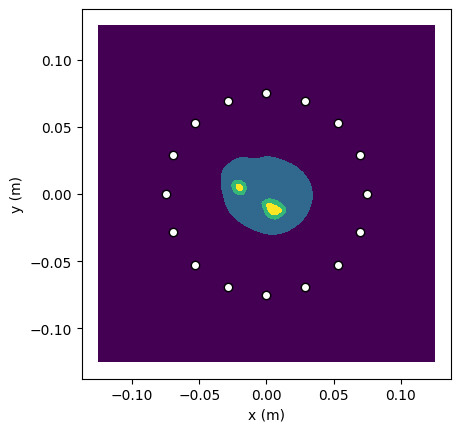

In [13]:
import os
import numpy as np
from scipy.constants import epsilon_0, pi

filename = 'pacient10_munieca_slice1'

string = "gmsh -2 "+filename+".geo -format msh2"
os.system(string)

string = "dolfin-convert "+filename+".msh "+filename+".xml"
os.system(string)

from fenics import *

# Create mesh, subdomains, and boundaries
mesh = Mesh(filename+".xml");
subdomains = MeshFunction('size_t',mesh,filename+"_physical_region.xml");
boundaries = MeshFunction('size_t',mesh,filename+"_facet_region.xml");

import matplotlib.pyplot as plt

plt.figure(1)

plot(subdomains)
##Uncomment to show the mesh
#plot(mesh)



#Position of the antennas
xposant = np.array([])
yposant = np.array([])
for n in range(0,16):
    xrint = (15.0e-2/2)*np.cos(n*2*pi/16)
    yrint = (15.0e-2/2)*np.sin(n*2*pi/16)
    xposant = np.append(xposant,xrint)
    yposant = np.append(yposant,yrint)

plt.plot(xposant,yposant,'ko',markeredgecolor ='k', markerfacecolor='w')

plt.ylabel(r'y (m)')
plt.xlabel(r'x (m)')

plt.show()

### 2. Grafico de un corte de calcáneo

La diferencia con el de muñeca es que el de calcáneo no tiene borde de hueso cortical, hay solo dos medios: músculo y hueso trabecular.

In [14]:
!wget https://raw.githubusercontent.com/rirastorza/heelSimulationDB/refs/heads/main/meshes/patient5_slice1.geo

--2025-02-04 21:23:46--  https://raw.githubusercontent.com/rirastorza/heelSimulationDB/refs/heads/main/meshes/patient5_slice1.geo
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9368 (9.1K) [text/plain]
Saving to: ‘patient5_slice1.geo’

patient5_slice1.geo 100%[===================>]   9.15K  --.-KB/s    in 0s      

2025-02-04 21:23:46 (49.2 MB/s) - ‘patient5_slice1.geo’ saved [9368/9368]



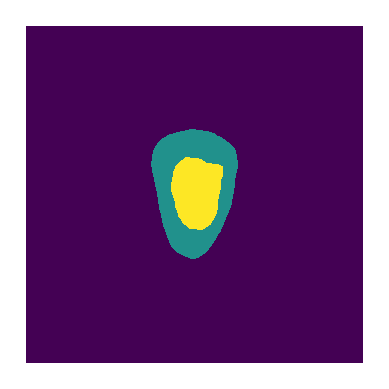

In [19]:
filename = 'patient5_slice1'

string = "gmsh -2 "+filename+".geo -format msh2"
os.system(string)

string = "dolfin-convert "+filename+".msh "+filename+".xml"
os.system(string)

# Create mesh, subdomains, and boundaries
mesh = Mesh(filename+".xml");
subdomains = MeshFunction('size_t',mesh,filename+"_physical_region.xml");
boundaries = MeshFunction('size_t',mesh,filename+"_facet_region.xml");

fig2 = plt.figure(2)

plot(subdomains)
##Uncomment to show the mesh
#plot(mesh)



#Position of the antennas
xposant = np.array([])
yposant = np.array([])
for n in range(0,16):
    xrint = (15.0e-2/2)*np.cos(n*2*pi/16)
    yrint = (15.0e-2/2)*np.sin(n*2*pi/16)
    xposant = np.append(xposant,xrint)
    yposant = np.append(yposant,yrint)

#plt.plot(xposant,yposant,'ko',markeredgecolor ='k', markerfacecolor='w')
plt.axis('off')
#plt.ylabel(r'y (m)')
#plt.xlabel(r'x (m)')

plt.show()

Puedo guardar la imagen en png para luego construir la matriz de permitividad compleja.

In [21]:
# Save the plot as a PNG file without axes
fig2.savefig('calcaneo.png', dpi=80,bbox_inches='tight', pad_inches=0)
